In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

In [ ]:
!pip install -U --force-reinstall matplotlib

In [3]:
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.cross_decomposition import PLSCanonical
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import StackingClassifier

import numpy as np
from sklearn.metrics import recall_score, precision_score, classification_report, f1_score
from google.colab import drive

!gdown 10uKko-btA83zgMaUcsz9Cf503S0mpmGh -O /content/train_dataset_train.csv
!gdown 1dN6OKDuYg70V7l9qrjL7CCxQN4W8ROyh -O /content/test_dataset_test.csv

df = pd.read_csv('/content/train_dataset_train.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=44)

Downloading...
From: https://drive.google.com/uc?id=10uKko-btA83zgMaUcsz9Cf503S0mpmGh
To: /content/train_dataset_train.csv
100% 206M/206M [00:01<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dN6OKDuYg70V7l9qrjL7CCxQN4W8ROyh
To: /content/test_dataset_test.csv
100% 84.8M/84.8M [00:00<00:00, 138MB/s]


## EDA

In [ ]:
report = ProfileReport(df_train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train.shape

(4222094, 6)

In [ ]:
df_train.head()

id      Easting      Northing   Height  Reflectance  Class
0  2321251  431696.5375  6.032319e+06  69.2226       -11.14      0
1  3515173  431710.3835  6.032291e+06  68.9711       -15.16      3
2  2320295  431696.8099  6.032322e+06  69.2453       -13.59      0
3  2454459  431680.4542  6.032343e+06  69.1892       -11.21      0
4  4608150  431720.0914  6.032288e+06  67.3252        -9.10      0

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
 5   Class        int64  
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


Пострим на распределение данных

In [ ]:
df_train.isna().sum()

id             0
Easting        0
Northing       0
Height         0
Reflectance    0
Class          0
dtype: int64

Text(0.5, 1.0, 'Распределение класса точки')

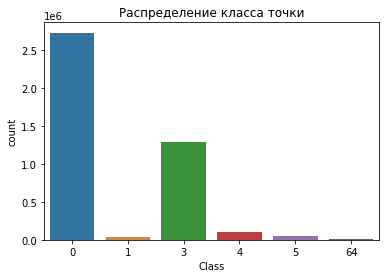

In [ ]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

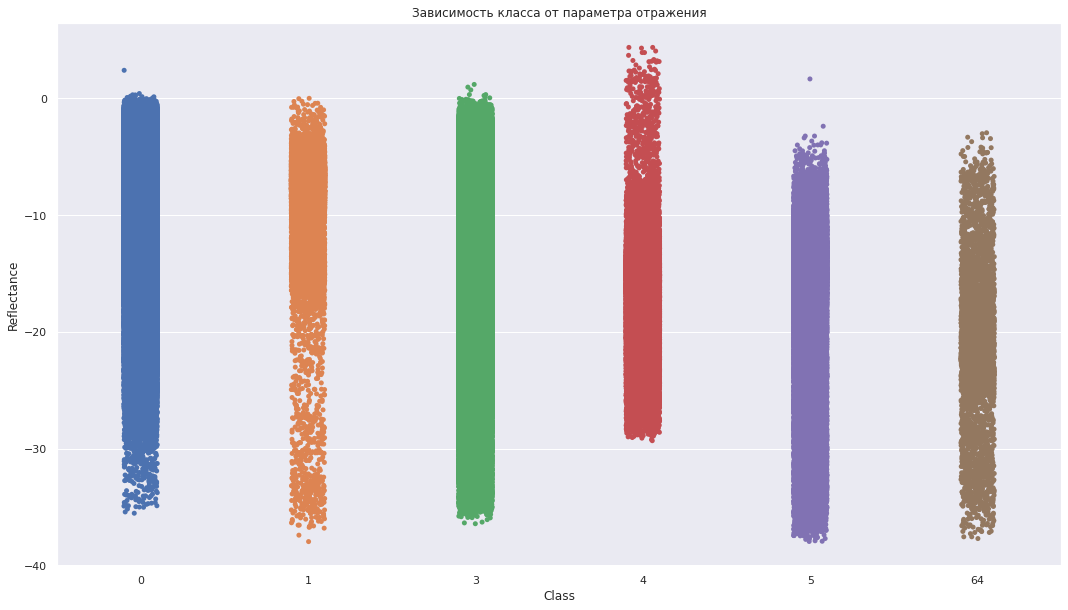

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

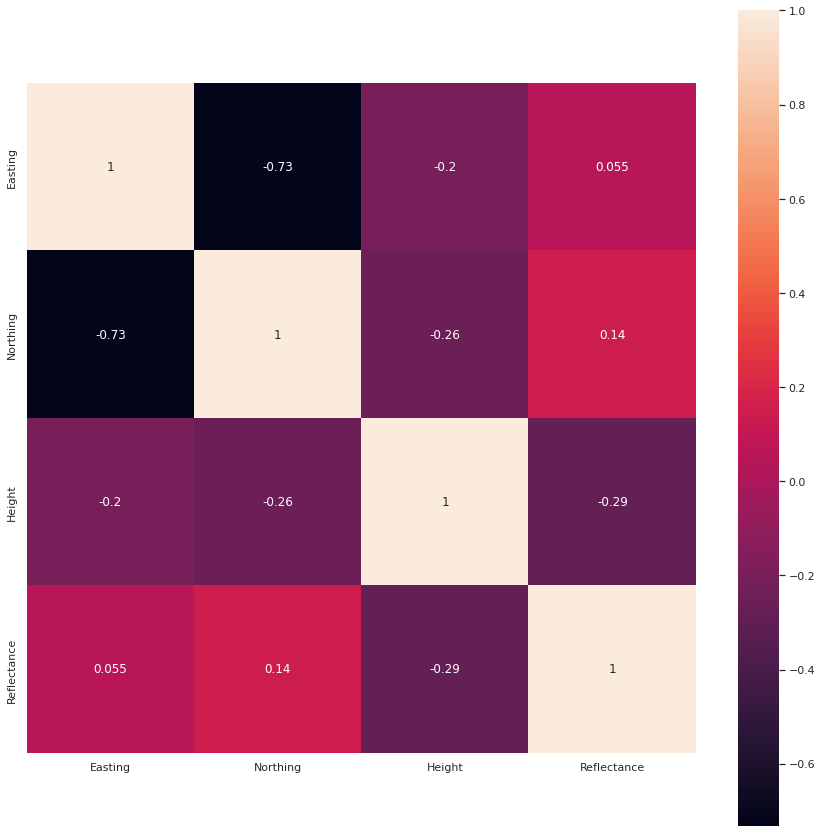

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.drop(['id', 'Class'], axis=1).corr(), square = True, annot=True)

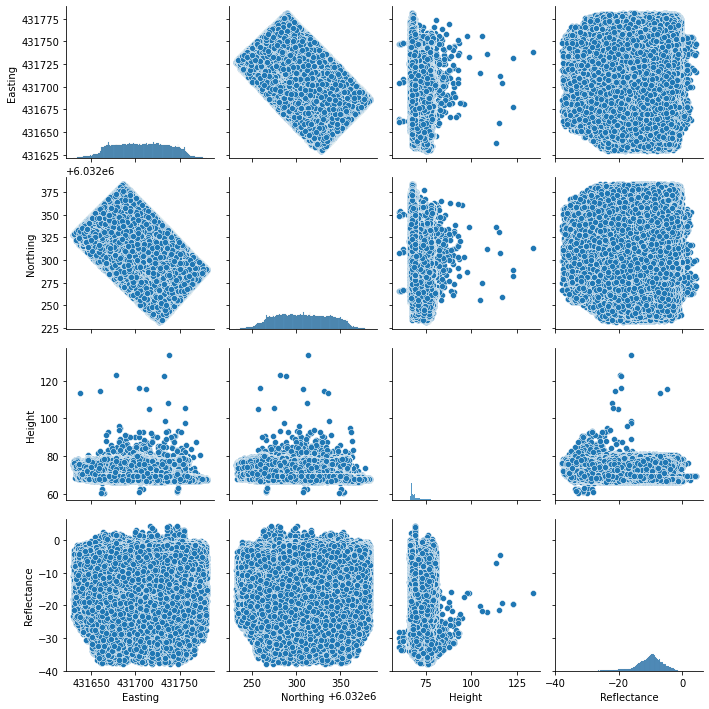

In [ ]:
sns.pairplot(df_train.drop(['id', 'Class'], axis=1))

## Preprocessing

In [4]:
# train dataset
X_train = df_train.drop(["Class", "id"], axis = 1)
y_train = df_train[["Class"]]
# test dataset
X_test = df_test.drop(["Class", "id"], axis = 1)
y_test = df_test[['Class']]

# # scaling data
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=['Easting', 'Northing', 'Height','Reflectance'])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=['Easting', 'Northing', 'Height','Reflectance'])


# cut 0, 3 and 4 class to 100 000 samples
class0 = df_train[df_train.Class == 0]
class0 = class0.sample(100000, random_state=44).reset_index(drop=True)
class1 = df_train[df_train.Class == 1]
class3 = df_train[df_train.Class == 3]
class3 = class3.sample(100000, random_state=44).reset_index(drop=True)
class4 = df_train[df_train.Class == 4]
class5 = df_train[df_train.Class == 5]
class64 = df_train[df_train.Class == 64]

short_df = pd.concat([class0, class1, class3, class4, class5, class64], axis=0)

X_short = short_df.drop(["Class", "id"], axis = 1)
y_short = short_df[["Class"]]

X_short = pd.DataFrame(scaler.fit_transform(X_train), columns=['Easting', 'Northing', 'Height','Reflectance'])

###### standart

In [ ]:
# take all samples
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=44)
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)
y_train.shape

In [ ]:
len(df_train[df_train.Class == 64])

4416

In [ ]:
# take only 4416 samples from each class
class0 = df_train[df_train.Class == 0]
class0 = class0.sample(16000, random_state=44).reset_index(drop=True)
class1 = df_train[df_train.Class == 1]
class1 = class1.sample(16000, random_state=44).reset_index(drop=True)
class3 = df_train[df_train.Class == 3]
class3 = class3.sample(16000, random_state=44).reset_index(drop=True)
class4 = df_train[df_train.Class == 4]
class4 = class4.sample(16000, random_state=44).reset_index(drop=True)
class5 = df_train[df_train.Class == 5]
class5 = class5.sample(16000, random_state=44).reset_index(drop=True)
class64 = df_train[df_train.Class == 64]

short_df = pd.concat([class0, class1, class3, class4, class5, class64], axis=0)

X = short_df.drop(["Class", "id"], axis = 1)
y = short_df[["Class"]]

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)

print(X_train.shape, X_test.shape)

(84416, 4)
(67532, 4) (16884, 4)


###### imbalanced-learn

In [1]:
# function to easy train and test access 
def train_imblearn_and_test(X_resampled_train, y_resampled_train, 
                            X_test, y_test, clf_type='forest', stacking=None):
    print(y_resampled_train.value_counts())
    print()

    if clf_type =='forest':
        clf = RandomForestClassifier(bootstrap=False, verbose = 1,
                                    oob_score=False, n_estimators=1000, random_state=44)
    elif clf_type == 'kneigh':
        clf = KNeighborsClassifier()
    elif clf_type == 'svm':
        clf = SVC(random_state=44)
    elif clf_type == 'mlp':
        clf = MLPClassifier(random_state=44, verbose=1, hidden_layer_sizes=(256, 128, 64, 32, 16, 6), n_iter_no_change=150, max_iter=2000)
    else:
        clf_type='tree'
        clf = DecisionTreeClassifier(random_state=44)

    if stacking is not None:
        estimators = []
        clf_type = ', '.join(stacking)

        if 'forest' in stacking:
            forest = RandomForestClassifier(bootstrap=False, verbose = 1,
                                            oob_score=False, n_estimators=1000, random_state=44)
            estimators.append(forest)
        if 'kneigh' in stacking:
            kmeans = KNeighborsClassifier()
            estimators.append(kmeans)
        if 'svm' in stacking:
            svm = SVC(random_state=44)
            estimators.append(svm)
        if 'mlp' in stacking:
            mlp = MLPClassifier(random_state=44, verbose=1, hidden_layer_sizes=(64, 32, 16, 6), n_iter_no_change=100, max_iter=2000)
            estimators.append(mlp)
        if 'tree' in stacking:
            tree = DecisionTreeClassifier(random_state=44)
            estimators.append(tree)
        
        stack_model = StackingClassifier(estimators=list(zip(stacking, estimators)), 
                                         final_estimator=LogisticRegression(max_iter=100, solver='saga', random_state=44))
        stack_model.fit(X_resampled_train, y_resampled_train.to_numpy().reshape(-1))
        y_pred = stack_model.predict(X_test)

    else:
        clf.fit(X_resampled_train, y_resampled_train.to_numpy().reshape(-1))
        y_pred = clf.predict(X_test)

    print(clf_type, 'result:')
    print('f1-score:', f1_score(y_test, y_pred, average=None, zero_division=0))
    print('f1-score weights:', f1_score(y_test, y_pred, average='macro', zero_division=0))
    print('precision:', precision_score(y_test, y_pred, average=None, zero_division=0))
    print('precision: weights', precision_score(y_test, y_pred, average='macro', zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average='macro'))
    print('Recall weights:', recall_score(y_test, y_pred, average=None))

# Under Sampling
from imblearn.under_sampling import RandomUnderSampler              # very fast        
# default: 0.93, weighted: 0.94
from imblearn.under_sampling import NearMiss                        # 3 versions: 2,3=fail 
# default: 0.53, weighted: 0.75
from imblearn.under_sampling import EditedNearestNeighbours         # need_weights
# default: 0.93, weighted: 0.93
from imblearn.under_sampling import RepeatedEditedNearestNeighbours # need weights, slow
# default: 0.93, weighted: 0.92
from imblearn.under_sampling import AllKNN                          # need weights
# default: 0.93, weighted: 0.93
from imblearn.under_sampling import OneSidedSelection               # 
# default: 0.90, weighted: 0.94
from imblearn.under_sampling import NeighbourhoodCleaningRule       # 
# default: 0.91, weighted: 0.94
from imblearn.under_sampling import InstanceHardnessThreshold       # 

# Over Sampling
from imblearn.over_sampling import RandomOverSampler # 2 variations # very fast
# 0.93 / 0.96
from imblearn.over_sampling import SMOTE                            # very fast
# 0.96
from imblearn.over_sampling import ADASYN                           # very fast
# 0.96
from imblearn.over_sampling import BorderlineSMOTE                  # very fast
# 0.95
from imblearn.over_sampling import SVMSMOTE                         # very slow
# 

###### Test how works differenr types of UNDER SAMPLING

In [5]:
%%time
# cut all to 16 000: 
rus = RandomUnderSampler(sampling_strategy = {0: 20000, 
                                              1: 20000, 
                                              3: 20000, 
                                              4: 20000, 
                                              5: 20000}, random_state=44)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_rus_ada, y_rus_ada = ADASYN('minority').fit_resample(X_rus, y_rus)

# train_imblearn_and_test(X_rus_ada, y_rus_ada, X_test, y_test, 'forest')                             # 
# train_imblearn_and_test(X_rus_ada, y_rus_ada, X_test, y_test, 'tree')                               # 
# train_imblearn_and_test(X_rus_ada, y_rus_ada, X_test, y_test, 'kneigh')                             # 
train_imblearn_and_test(X_rus_ada, y_rus_ada, X_test, y_test, 'mlp')                                # 
# train_imblearn_and_test(X_rus_ada, y_rus_ada, X_test, y_test, stacking=['forest', 'kneigh', 'mlp']) #

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Class
64       20082
0        20000
1        20000
3        20000
4        20000
5        20000
dtype: int64

Iteration 1, loss = 0.62211414
Iteration 2, loss = 0.33766017
Iteration 3, loss = 0.27025461
Iteration 4, loss = 0.23486199
Iteration 5, loss = 0.21770893
Iteration 6, loss = 0.20206171
Iteration 7, loss = 0.18958158
Iteration 8, loss = 0.18472340
Iteration 9, loss = 0.17686118
Iteration 10, loss = 0.17085754
Iteration 11, loss = 0.16717252
Iteration 12, loss = 0.16060570
Iteration 13, loss = 0.16007983
Iteration 14, loss = 0.15305915
Iteration 15, loss = 0.15447409
Iteration 16, loss = 0.14959695
Iteration 17, loss = 0.14805295
Iteration 18, loss = 0.14623466
Iteration 19, loss = 0.14398318
Iteration 20, loss = 0.14189832
Iteration 21, loss = 0.14103124
Iteration 22, loss = 0.13894879
Iteration 23, loss = 0.13692553
Iteration 24, loss = 0.13539852
Iteration 25, loss = 0.13322053
Iteration 26, loss = 0.13255998
Iteration 27, loss = 0.13211963
Iteration 28, loss = 0.12877270
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


mlp result:
f1-score: [0.95613509 0.91289851 0.93258861 0.84091882 0.98828055 0.10752554]
f1-score weights: 0.7897245206471091
precision: [0.98551566 0.84953729 0.91736262 0.72796245 0.99361396 0.05706917]
precision: weights 0.7551768586032042
Recall: 0.9615976664388487
Recall weights: [0.92845562 0.98647282 0.94832856 0.99536791 0.98300409 0.92795699]
CPU times: user 5h 58min 55s, sys: 1h 38min 56s, total: 7h 37min 52s
Wall time: 3h 54min 38s


In [ ]:
%%time
# cut all to 16 000: 
rus = RandomUnderSampler(sampling_strategy = {0: 16000, 
                                              1: 16000, 
                                              3: 16000, 
                                              4: 16000, 
                                              5: 16000}, random_state=44)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'forest')                             # 0.941
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'tree')                               # 0.915
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'kmeans')                             # 0.905
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'svm')                                # 0.298
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'mlp')                                # 0.955
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, stacking=['forest', 'kneigh', 'mlp']) # 0.958


# cut all
rus = RandomUnderSampler(random_state=44)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'forest')                             # 0.931
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'tree')                               # 0.892
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'kneigh')                             # 0.902 
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'svm')                                # 0.369
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, 'mlp')                                # 
train_imblearn_and_test(X_rus, y_rus, X_test, y_test, stacking=['forest', 'kneigh', 'mlp']) # 0.948

In [ ]:
%%time
nm1 = NearMiss(version=1)
X_nm1, y_nm1 = nm1.fit_resample(X_train, y_train)
train_imblearn_and_test(X_nm1, y_nm1, X_test, y_test)

Class
0        3486
1        3486
3        3486
4        3486
5        3486
64       3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished


Recall: 0.5361070539385582
Recall weights: [0.18148414 0.34323641 0.22781399 0.89264174 0.80049831 0.77096774]
CPU times: user 39.8 s, sys: 291 ms, total: 40.1 s
Wall time: 41.3 s


In [ ]:
%%time
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train, y_train)
train_imblearn_and_test(X_enn, y_enn, X_test, y_test)

# cut randomly all by the number of 16 000
rus = RandomUnderSampler(sampling_strategy = weights, random_state=44)
X_enn_rus, y_enn_rus = rus.fit_resample(X_enn, y_enn)
train_imblearn_and_test(X_enn_rus, y_enn_rus, X_test, y_test)

# cut randomly all by the number of smallest
rus = RandomUnderSampler(random_state=44)
X_enn_rus, y_enn_rus = rus.fit_resample(X_enn, y_enn)
train_imblearn_and_test(X_enn_rus, y_enn_rus, X_test, y_test)

Class
0        1973194
3         896945
4          45860
5          43805
1          30145
64          3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 27.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.8s finished


Recall: 0.8854862155208562
Recall weights: [0.98456646 0.97939317 0.93421974 0.82813028 0.99305926 0.59354839]
Class
0        16000
1        16000
3        16000
4        16000
5        16000
64        3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.2s finished


Recall: 0.9301416910753062
Recall weights: [0.94408131 0.9783818  0.8966999  0.9305187  0.98923296 0.84193548]
Class
0        3486
1        3486
3        3486
4        3486
5        3486
64       3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.8s finished


Recall: 0.9208892464218142
Recall weights: [0.92393389 0.95474083 0.83867016 0.93003619 0.9747286  0.90322581]
CPU times: user 29min 25s, sys: 3.47 s, total: 29min 29s
Wall time: 30min 12s


In [ ]:
%%time
renn = RepeatedEditedNearestNeighbours()
X_renn, y_renn = renn.fit_resample(X_train, y_train)
print(y_renn.value_counts())
X_renn_rus, y_renn_rus = rus.fit_resample(X_renn, y_renn)
train_imblearn_and_test(X_renn_rus, y_renn_rus, X_test, y_test)

Class
0        1957910
3         887984
5          43730
4          42352
1          29952
64          3486
dtype: int64
Class
0        16000
1        16000
3        16000
4        16000
5        16000
64        3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.1s finished


Recall: 0.9246168764759708
CPU times: user 13min 9s, sys: 1.9 s, total: 13min 11s
Wall time: 13min 39s


In [ ]:
%%time
allknn = AllKNN()
X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)
print(y_allknn.value_counts())
X_allknn_rus, y_allknn_rus = rus.fit_resample(X_allknn, y_allknn)
train_imblearn_and_test(X_allknn_rus, y_allknn_rus, X_test, y_test)

Class
0        2033279
3         916054
4          50842
5          43967
1          30320
64          3486
dtype: int64
Class
0        16000
1        16000
3        16000
4        16000
5        16000
64        3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.7s finished


Recall: 0.9291127047556452
CPU times: user 4min 24s, sys: 777 ms, total: 4min 25s
Wall time: 4min 32s


In [ ]:
%%time
oss = OneSidedSelection(sampling_strategy=[0, 3], random_state=44)
X_oss, y_oss = oss.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_oss.value_counts())
big_rus = RandomUnderSampler(sampling_strategy={0:250000, 3:250000}, random_state=44)
X_oss_rus, y_oss_rus = big_rus.fit_resample(X_oss, y_oss)
train_imblearn_and_test(X_oss_rus, y_oss_rus, X_test, y_test)

Class
0        2184568
3        1030672
4          82728
5          44747
1          31474
64          3486
dtype: int64
Class
0        2134580
3         990971
4          82728
5          44747
1          31474
64          3486
dtype: int64
Class
0        250000
3        250000
4         82728
5         44747
1         31474
64         3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.7s finished


Recall: 0.9218662518317412
CPU times: user 8min 56s, sys: 9.91 s, total: 9min 6s
Wall time: 9min 3s


In [ ]:
%%time
ncr = NeighbourhoodCleaningRule()
X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)
print(y_ncr.value_counts())
X_ncr_rus, y_ncr_rus = rus.fit_resample(X_ncr, y_ncr)
train_imblearn_and_test(X_ncr_rus, y_ncr_rus, X_test, y_test)

Class
0        2108218
3         958631
4          62834
5          44301
1          30876
64          3486
dtype: int64
Class
0        16000
1        16000
3        16000
4        16000
5        16000
64        3486
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.2s finished


Recall: 0.9355436883451188
CPU times: user 4min 2s, sys: 2.71 s, total: 4min 5s
Wall time: 4min 15s


###### Test how works differenr types of OVER SAMPLING

at first, datasets needs to be downsapled for faster results, that's why takes X_short_train, y_short_train

In [ ]:
%%time
ros0 = RandomOverSampler(sampling_strategy={64: 150000, 
                                            4: 150000}, random_state=44, shrinkage=0.2)
X_ros0, y_ros0 = ros0.fit_resample(X_train, y_train)
print(y_ros0.value_counts())
train_imblearn_and_test(X_ros0, y_ros0, X_test, y_test)

Class
0        2184568
3        1030672
4         150000
64        150000
5          44747
1          31474
dtype: int64
CPU times: user 1.44 s, sys: 447 ms, total: 1.89 s
Wall time: 2.09 s


In [ ]:
%%time
X_smote, y_smote = SMOTE().fit_resample(X_short, y_short)
train_imblearn_and_test(X_smote, y_smote, X_test, y_test)

Class
0        100000
1        100000
3        100000
4        100000
5        100000
64       100000
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Recall: 0.9555931146194688
CPU times: user 3min 48s, sys: 873 ms, total: 3min 49s
Wall time: 3min 48s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.7s finished


In [ ]:
%%time
X_adasyn, y_adasyn = ADASYN(sampling_strategy='not majority').fit_resample(X_short, y_short)
print(y_adasyn.value_counts())
train_imblearn_and_test(X_adasyn, y_adasyn, X_test, y_test)

Class
4        101129
0        100000
3        100000
1         99887
5         99848
64        99829
dtype: int64
Class
4        101129
0        100000
3        100000
1         99887
5         99848
64        99829
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.6s finished


Recall: 0.9565491406886535
CPU times: user 5min 4s, sys: 4.55 s, total: 5min 9s
Wall time: 5min 8s


In [ ]:
%%time
X_bsmote, y_bsmote = BorderlineSMOTE().fit_resample(X_short, y_short)
train_imblearn_and_test(X_bsmote, y_bsmote, X_test, y_test)

Class
0        100000
1        100000
3        100000
4        100000
5        100000
64       100000
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.1s finished


Recall: 0.9527216767602656
CPU times: user 3min 40s, sys: 720 ms, total: 3min 41s
Wall time: 3min 40s


In [ ]:
%%time
# first resample (undersample big classes by deleting noisy samples)
allknn = AllKNN(sampling_strategy=[0, 3, 4])
X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_allknn.value_counts())

# second resample (undersample big classes by deleting random samples) 
rus = RandomUnderSampler(sampling_strategy={0:100000, 3:100000}, random_state=44)
X_allknn_rus, y_allknn_rus = rus.fit_resample(X_allknn, y_allknn)
 
# third resample (oversample small classes to the level of bigest)
X_allknn_rus_adasyn, y_allknn_rus_adasyn = ADASYN({64:80000}).fit_resample(X_allknn_rus, y_allknn_rus)
X_allknn_rus_adasyn, y_allknn_rus_adasyn = ADASYN({5:80000}).fit_resample(X_allknn_rus_adasyn, y_allknn_rus_adasyn)
X_allknn_rus_adasyn, y_allknn_rus_adasyn = ADASYN({1:80000}).fit_resample(X_allknn_rus_adasyn, y_allknn_rus_adasyn)
X_allknn_rus_adasyn, y_allknn_rus_adasyn = ADASYN({4:80000}).fit_resample(X_allknn_rus_adasyn, y_allknn_rus_adasyn)
train_imblearn_and_test(X_allknn_rus_adasyn, y_allknn_rus_adasyn, X_test, y_test)

# third alternative SMOTE resample
X_allknn_rus_smote, y_allknn_rus_smote = SMOTE().fit_resample(X_allknn_rus, y_allknn_rus)
train_imblearn_and_test(X_allknn_rus_adasyn, y_allknn_rus_adasyn, X_test, y_test)

Class
0        2184568
3        1030672
4          82728
5          44747
1          31474
64          3486
dtype: int64
Class
0        2033115
3         916042
4          50842
5          44747
1          31474
64          3486
dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={64: 80000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={5: 80000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 80000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={4: 80000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Class
0        100000
3        100000
5         80207
64        79954
1         79794
4         79517
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.3s finished


Recall: 0.945022260264848
Recall weights: [0.96124413 0.99190898 0.92634477 0.92868516 0.99528386 0.86666667]
Class
0        100000
3        100000
5         80207
64        79954
1         79794
4         79517
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.4s finished


Recall: 0.945022260264848
Recall weights: [0.96124413 0.99190898 0.92634477 0.92868516 0.99528386 0.86666667]
CPU times: user 10min 52s, sys: 1.92 s, total: 10min 53s
Wall time: 10min 51s


In [ ]:
%%time
# first: OVERSAMPLE small classes
ros1 = RandomOverSampler(sampling_strategy={1:80000, 
                                            5:80000, 
                                            64:80000}, random_state=44, shrinkage=0.2)
X_ros1, y_ros1 = ros1.fit_resample(X_train, y_train)
print(y_train.value_counts())
# RandomForest training
train_imblearn_and_test(X_ros1, y_ros1, X_test, y_test)

# second: DOWNSAMPLE noise in all classes
allknn = AllKNN()
X_ros1_allknn, y_ros1_allknn = allknn.fit_resample(X_ros1, y_ros1)
# RandomForest training
train_imblearn_and_test(X_ros1_allknn, y_ros1_allknn, X_test, y_test)

# third: DOWNSAMPLE big classes
rus = RandomUnderSampler(sampling_strategy={0:80000, 
                                            3:80000}, random_state=44)
X_ros1_allknn_rus, y_ros1_allknn_rus = rus.fit_resample(X_ros1_allknn, y_ros1_allknn)
# RandomForest training
train_imblearn_and_test(X_ros1_allknn_rus, y_ros1_allknn_rus, X_test, y_test)

Class
0        2184568
3        1030672
4          82728
5          44747
1          31474
64          3486
dtype: int64
Class
0        2184568
3        1030672
4          82728
1          80000
5          80000
64         80000
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 41.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.2s finished


Recall: 0.9283654493167738
Recall weights: [0.98416021 0.98419722 0.95310799 0.91874548 0.99234739 0.73763441]
Class
0        2093021
3         957711
1          80000
5          78496
64         73853
4          64441
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 36.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.9s finished


Recall: 0.9276291105327549
Recall weights: [0.98544299 0.9897598  0.94293859 0.89288299 0.98700836 0.76774194]
Class
0        80000
1        80000
3        80000
5        78496
64       73853
4        64441
dtype: int64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.0s finished


Recall: 0.9493952686173527
Recall weights: [0.95040368 0.99228824 0.93245419 0.97220748 0.98665243 0.86236559]
CPU times: user 1h 24min 20s, sys: 12.7 s, total: 1h 24min 32s
Wall time: 1h 24min 7s


## Training

In [ ]:
clf = MLPClassifier(random_state=44, verbose=1, hidden_layer_sizes=(128, 64, 32, 16, 6), n_iter_no_change=75, max_iter=1500)

# make prediction(?m)

best_clf = forest or mlp or stacking(forest, kneigh, mlp)

In [ ]:
# take all dataset
X_all = df.drop(["Class", "id"], axis = 1)
y_all = df[["Class"]].to_numpy().reshape(-1)
X_all = pd.DataFrame(scaler.fit_transform(X_all), columns=['Easting', 'Northing', 'Height','Reflectance'])
rus = RandomUnderSampler(sampling_strategy = {0: 20000, 
                                              1: 20000, 
                                              3: 20000, 
                                              4: 20000, 
                                              5: 20000}, random_state=44)
X_rus, y_rus = rus.fit_resample(X_all, y_all)
X_rus_ada, y_rus_ada = ADASYN(sampling_strategy='minority').fit_resample(X_rus, y_rus)

mlp = MLPClassifier(random_state=44, verbose=1, hidden_layer_sizes=(256, 64, 32, 16, 6), n_iter_no_change=150, max_iter=3000, 
                    learning_rate_init = 0.001)
mlp.fit(X_rus_ada, y_rus_ada)

to_predict = pd.read_csv('/content/test_dataset_test.csv')
to_predict, id = to_predict.drop(["id"], axis = 1), to_predict['id']
to_predict = scaler.fit_transform(to_predict)

pred = mlp.predict(to_predict)
predict_df = pd.concat([id, pd.Series(pred, name='Class')], axis=1)
predict_df.to_csv('prediction_3000.csv', sep=',', index=False)

Iteration 1, loss = 0.70894883
Iteration 2, loss = 0.36718622
Iteration 3, loss = 0.29219820
Iteration 4, loss = 0.25438783
Iteration 5, loss = 0.23413735
Iteration 6, loss = 0.21821505
Iteration 7, loss = 0.20915786
Iteration 8, loss = 0.20187042
Iteration 9, loss = 0.19322358
Iteration 10, loss = 0.18965537
Iteration 11, loss = 0.18499687
Iteration 12, loss = 0.18120246
Iteration 13, loss = 0.17734418
Iteration 14, loss = 0.17346810
Iteration 15, loss = 0.17072577
Iteration 16, loss = 0.16877902
Iteration 17, loss = 0.16676782
Iteration 18, loss = 0.16487278
Iteration 19, loss = 0.16378436
Iteration 20, loss = 0.15934622
Iteration 21, loss = 0.15886301
Iteration 22, loss = 0.15894618
Iteration 23, loss = 0.15821895
Iteration 24, loss = 0.15569019
Iteration 25, loss = 0.15439430
Iteration 26, loss = 0.15243906
Iteration 27, loss = 0.15231400
Iteration 28, loss = 0.15114064
Iteration 29, loss = 0.14954596
Iteration 30, loss = 0.14927679
Iteration 31, loss = 0.14866450
Iteration 32, los